## IMPORT LIBARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.express as px
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


## Load  dataset

In [3]:
train_df = pd.read_json('../Dataset/train.json')
test_df = pd.read_json('../Dataset/test.json')

# EDA  AND CLEANING DATA

In [4]:
train_df.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,100.584850,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,100.566949,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,100.565660,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,...,100.428438,0,None,NaN,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",NaN,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       14271 non-null  int64  
 1   province                 14271 non-null  object 
 2   district                 14271 non-null  object 
 3   subdistrict              14260 non-null  object 
 4   address                  14271 non-null  object 
 5   property_type            14271 non-null  object 
 6   total_units              10509 non-null  float64
 7   bedrooms                 14228 non-null  float64
 8   baths                    14236 non-null  float64
 9   floor_area               14271 non-null  int64  
 10  floor_level              8093 non-null   float64
 11  land_area                4917 non-null   float64
 12  latitude                 14271 non-null  float64
 13  longitude                14271 non-null  float64
 14  nearby_stations       

### Colums that have Null values 
    - subdistrict 14260/14271
    - total_units 10509/14271
    - bedrooms    14228/14271
    - baths       14236/14271
    - floor_level 8093/14271
    - land_area   4917/14271
    - nearby_station_distance 7228/14271
    - nearby_bus_stops 6009/14271
    - nearby_supermarkets 13885/14271
    - month_built 8397/14271
    

<Figure size 1000x800 with 0 Axes>

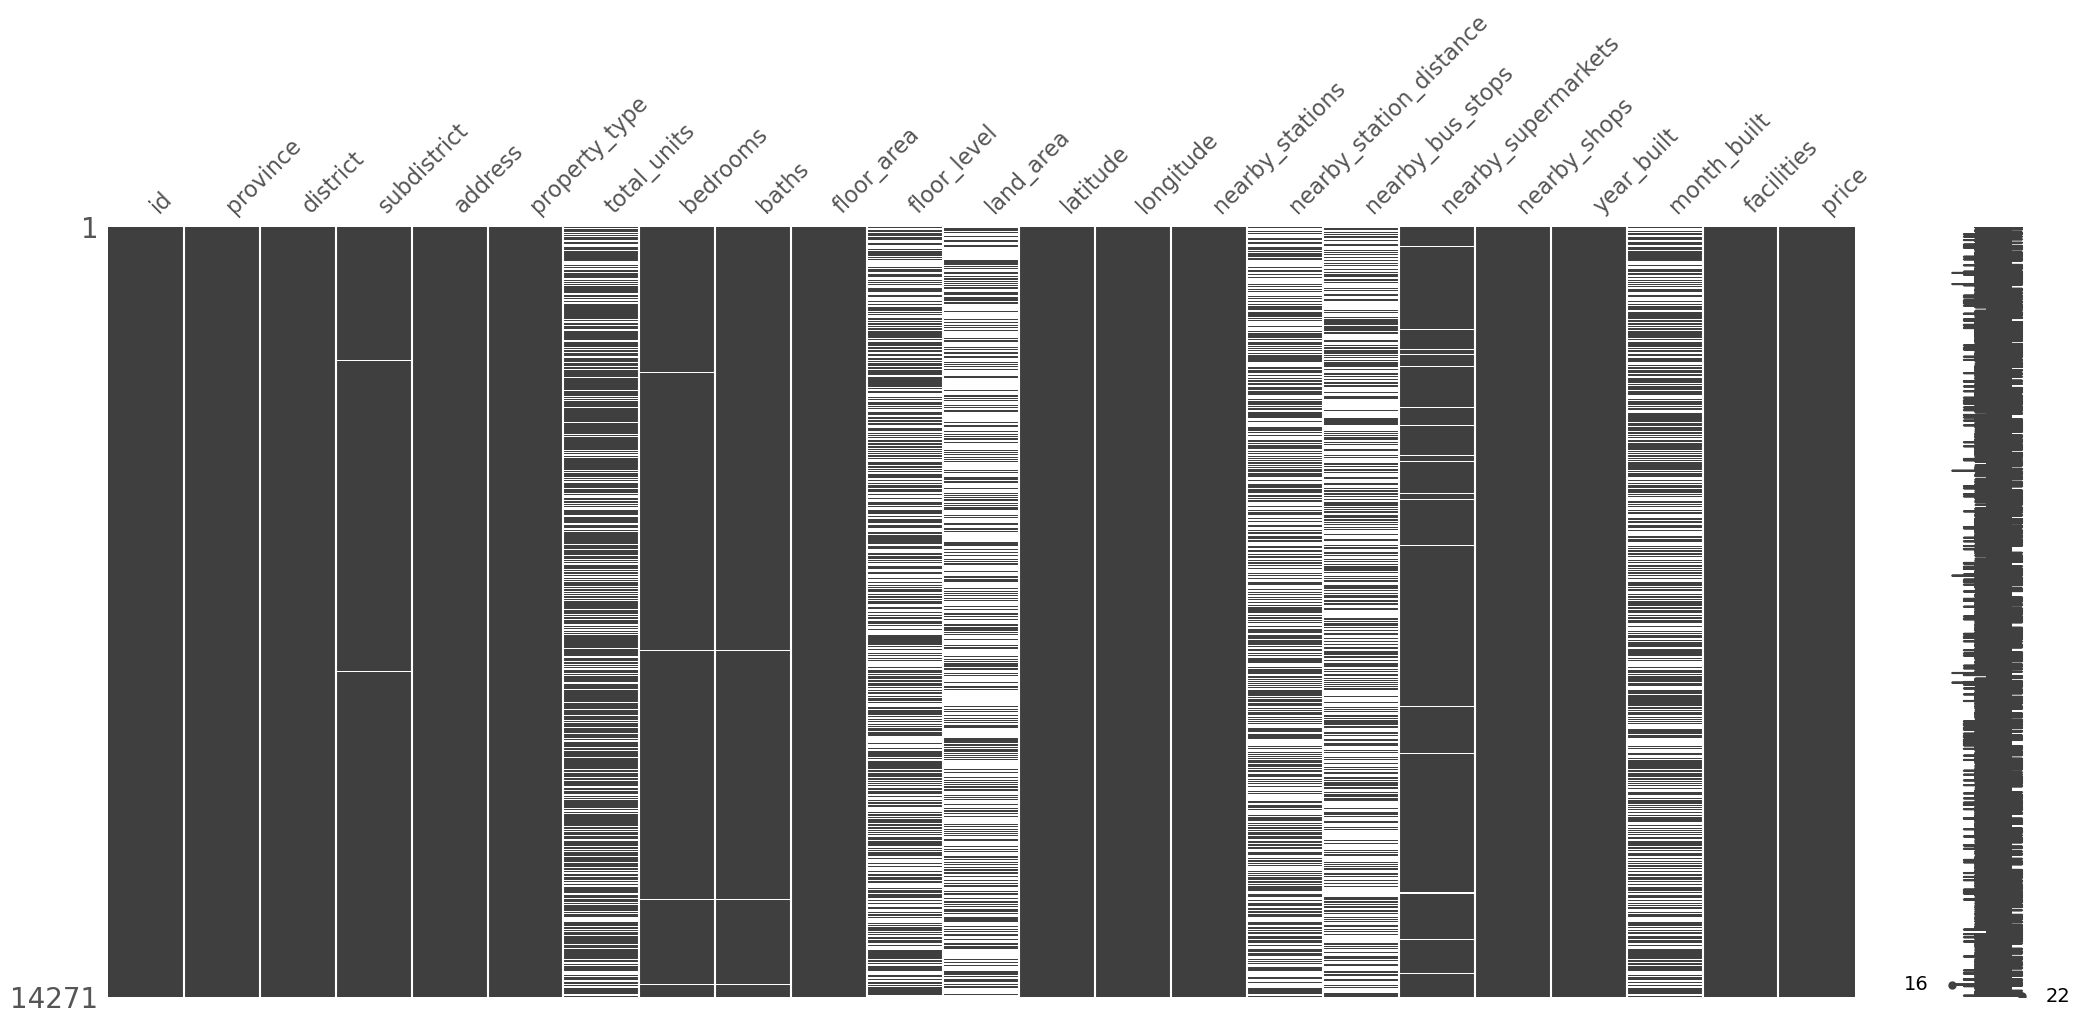

In [6]:
import missingno as msno
import matplotlib.pyplot as plt

# Create 
plt.figure(figsize=(10, 8))  # Adjusted size
msno.matrix(train_df)

plt.show()


/var/folders/tr/y6nybfjj6xxgwrmyj_nbfb5w0000gn/T/ipykernel_2104/2605924353.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  price_correlations = train_df.corr()['price'].abs()


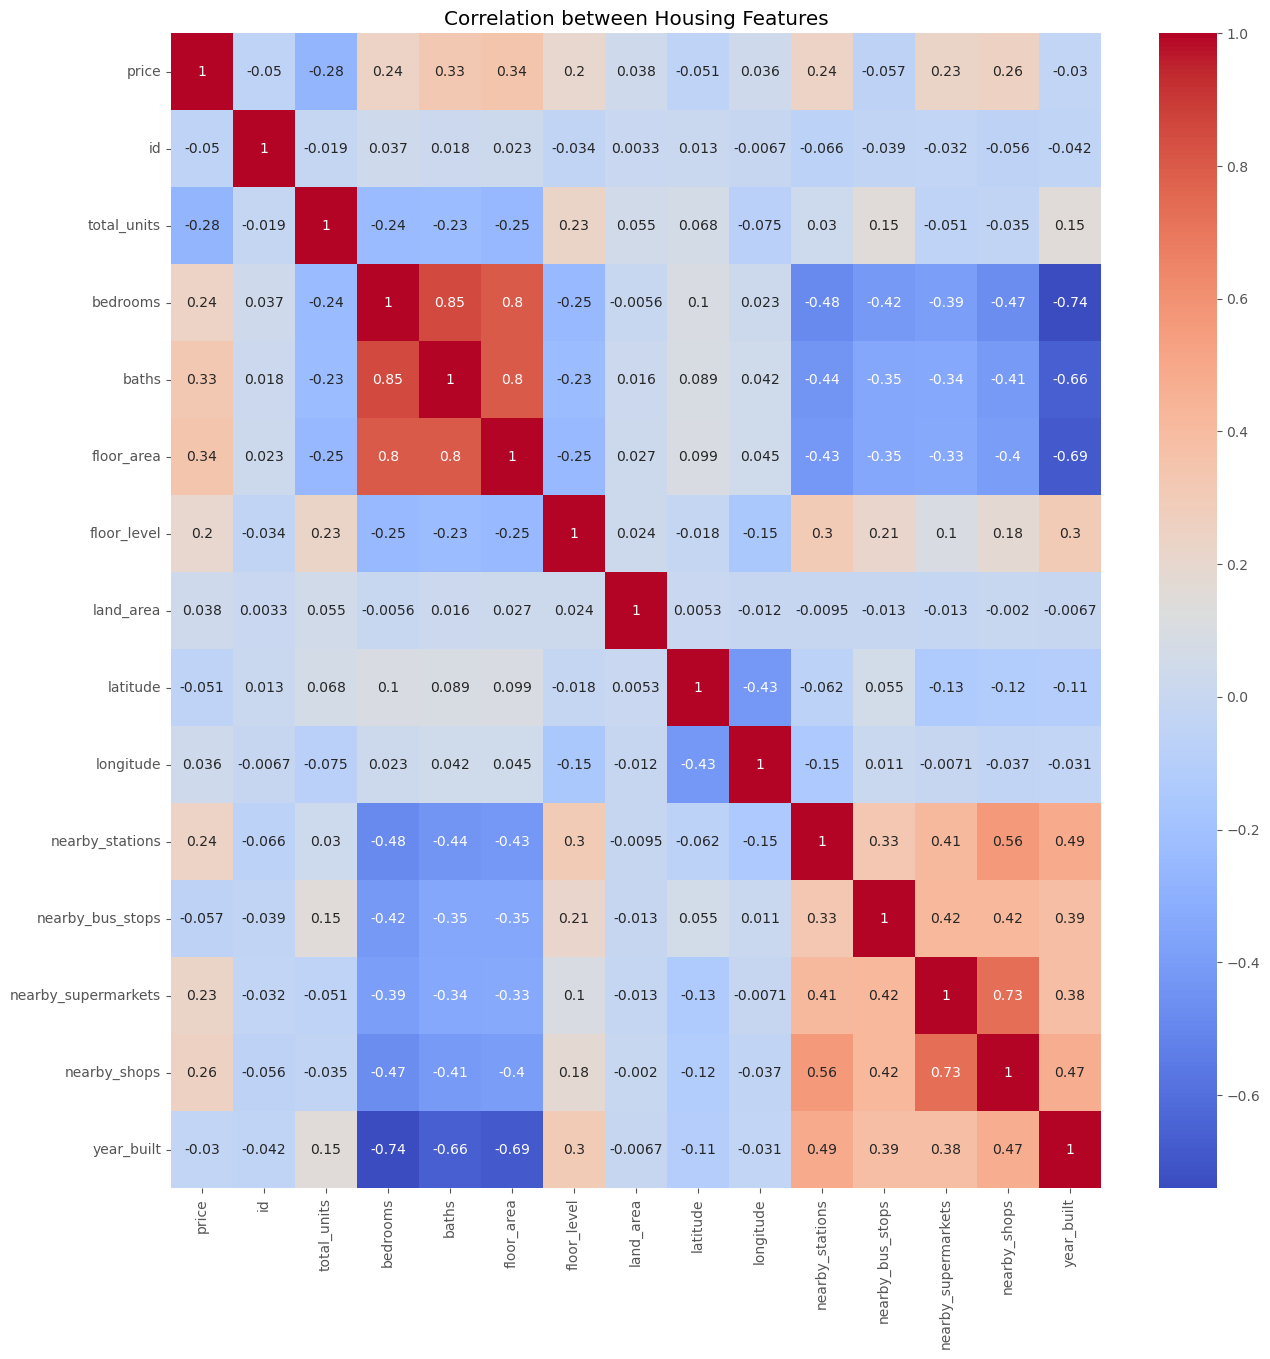

In [7]:
price_correlations = train_df.corr()['price'].abs() 
subset_df = train_df[price_correlations.index]

# Move 'price' to the first index
subset_df = subset_df[['price'] + [col for col in subset_df if col != 'price']]

# Create the heatmap
plt.figure(figsize=(15, 15))  #setting size of heatmap for clearly 
sns.heatmap(subset_df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation between Housing Features')

# Show the plot
plt.show()


/var/folders/tr/y6nybfjj6xxgwrmyj_nbfb5w0000gn/T/ipykernel_2104/3650453213.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='province', y='price', hue='property_type', data=train_df, ci=None)


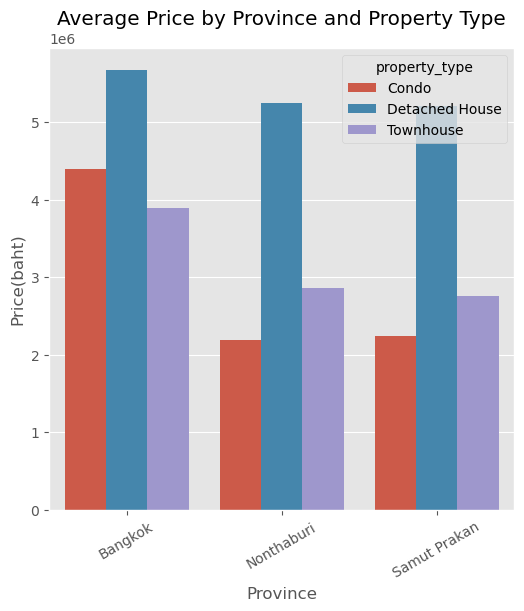

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))

# x: province and y:price
sns.barplot(x='province', y='price', hue='property_type', data=train_df, ci=None)

# make a label
plt.xlabel('Province')
plt.ylabel('Price(baht)')
plt.title('Average Price by Province and Property Type')


plt.xticks(rotation=30)
plt.savefig("first.png")
# show graph
plt.show()

#As we know Type of property most effect to price

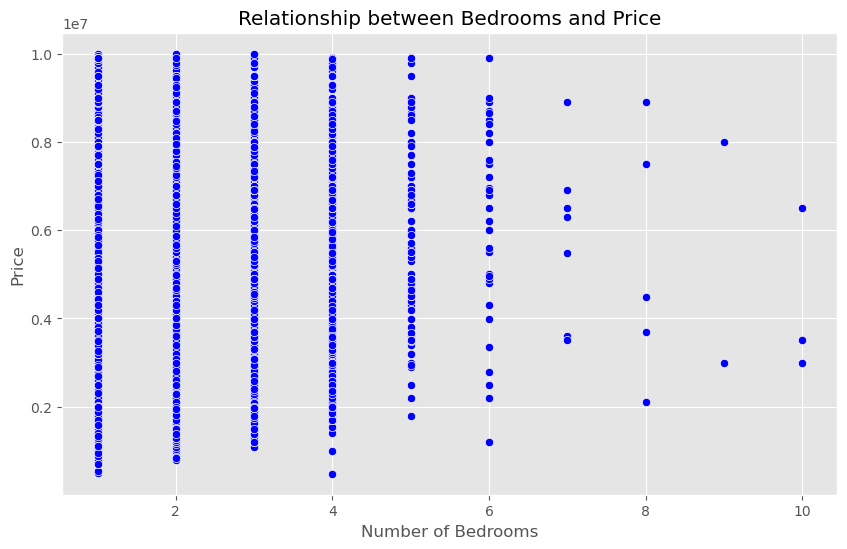

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='bedrooms', y='price', color='blue')
plt.title('Relationship between Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


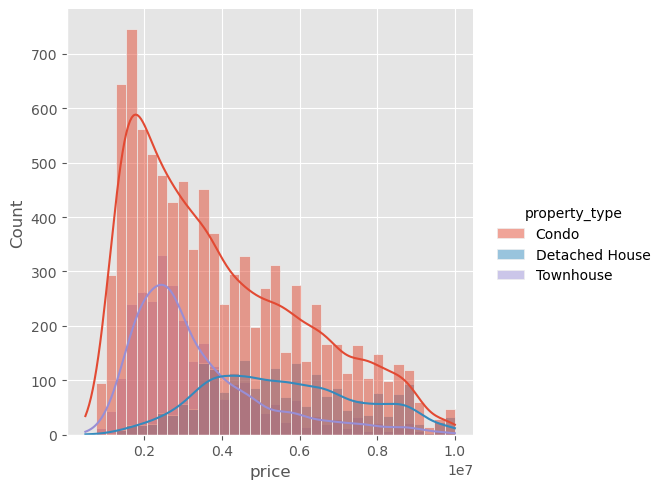

In [10]:
sns.displot(x="price", hue='property_type', kde=True, data=train_df);

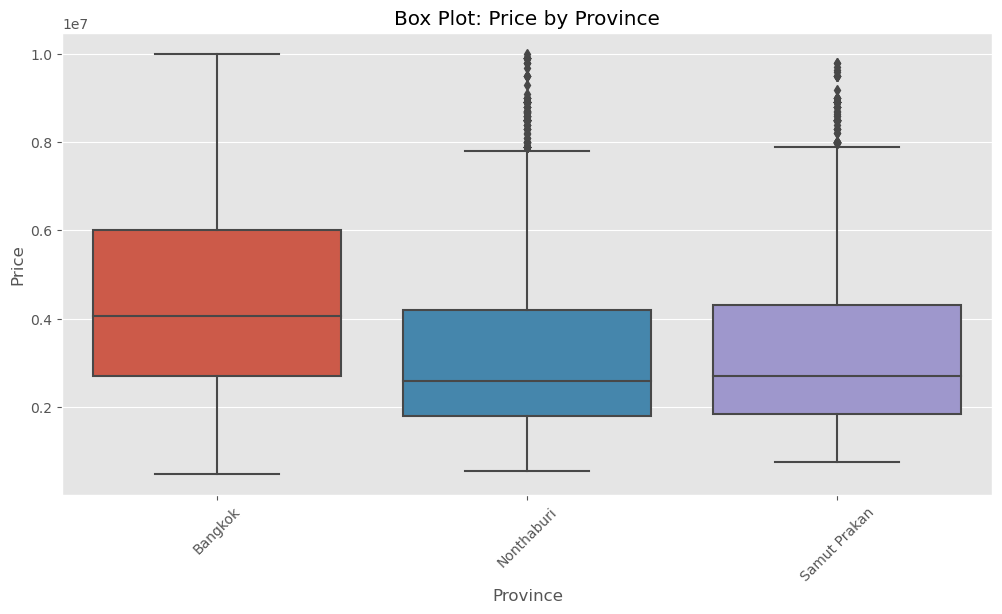

In [11]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='province', y='price')
plt.title('Box Plot: Price by Province')
plt.xlabel('Province')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


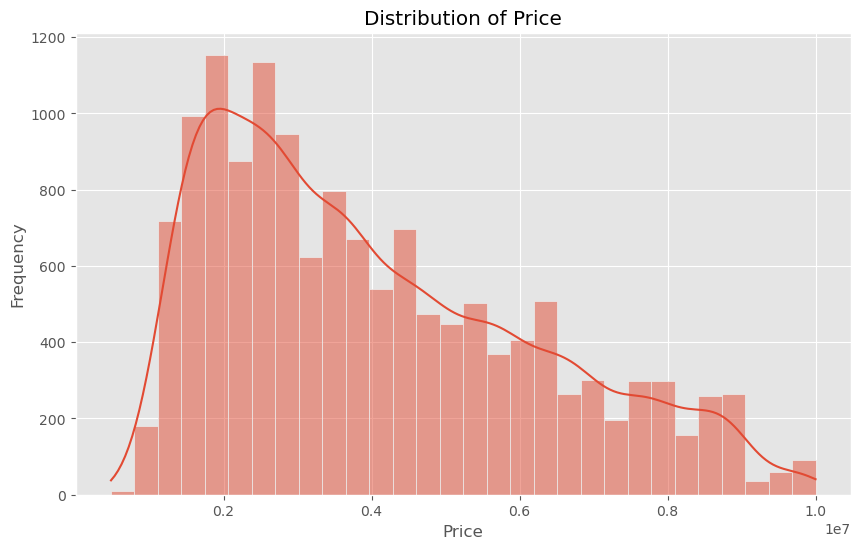

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


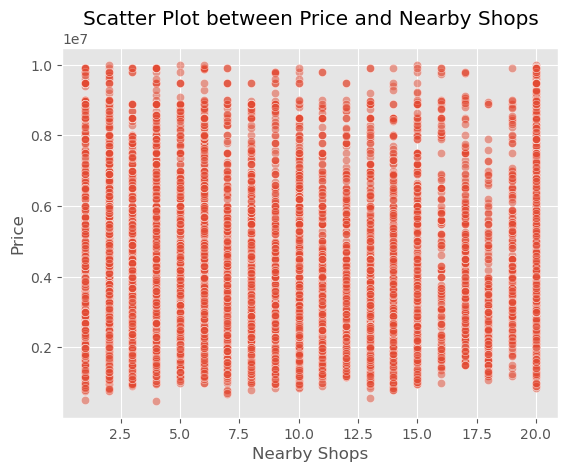

In [13]:
sns.scatterplot(data=train_df, x='nearby_shops', y='price', alpha=0.5)
plt.title('Scatter Plot between Price and Nearby Shops')
plt.xlabel('Nearby Shops')
plt.ylabel('Price')
plt.show()

### Check outlier

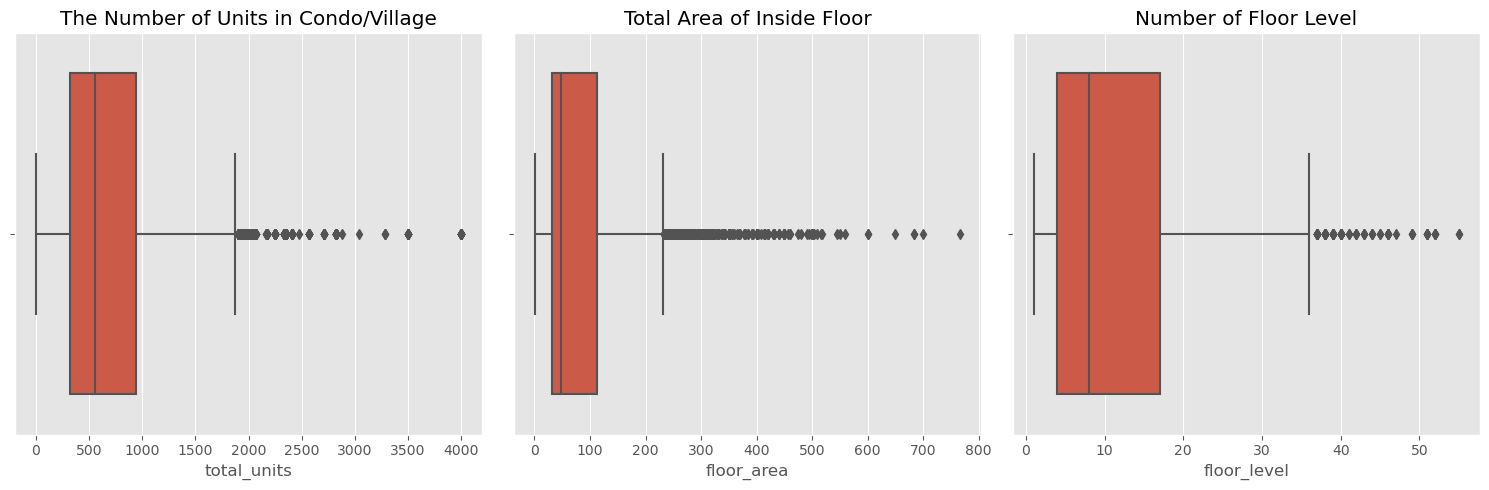

In [14]:
# Check outlier of total unit found outlier 
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=train_df['total_units'])
plt.title('The Number of Units in Condo/Village')

# Check outlier of floor area found outlier 
plt.subplot(1, 3, 2)
sns.boxplot(x=train_df['floor_area'])
plt.title("Total Area of Inside Floor")

# Check outlier and found outlier 
plt.subplot(1, 3, 3)
sns.boxplot(x=train_df['floor_level'])
plt.title("Number of Floor Level")

plt.tight_layout()
plt.savefig("outlier_plots.png")
plt.show()


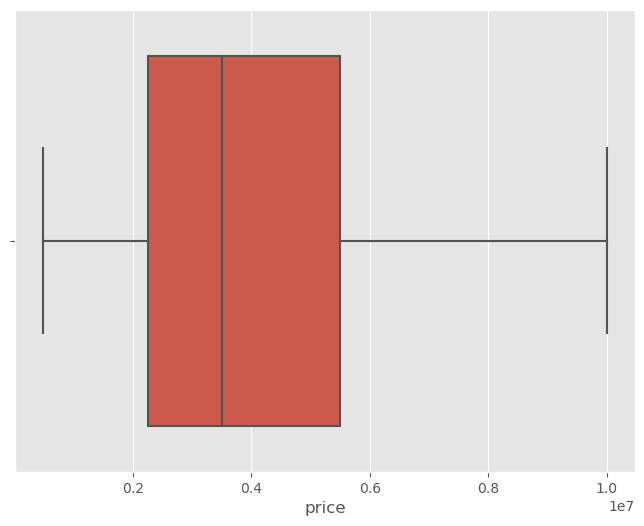

In [15]:
#Check outlier of price found no outlier 
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['price'])
plt.show()

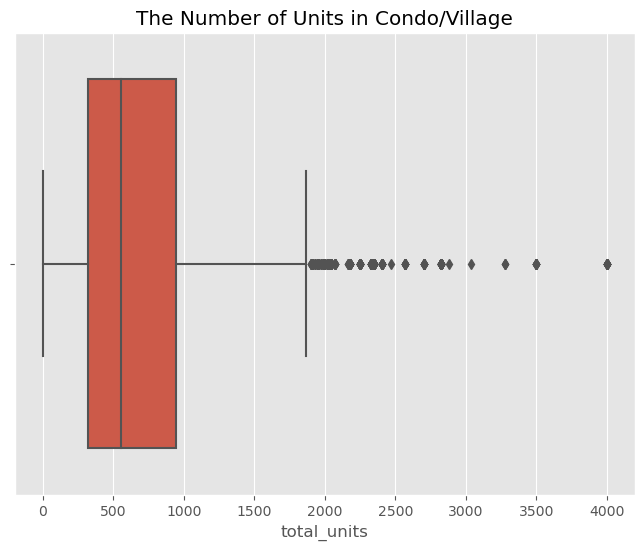

In [16]:
#check outlier of total unit found outlier 
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['total_units'])
plt.title('The Number of Units in Condo/Village')
#plt.savefig("outlier of total unit.png")
plt.show()


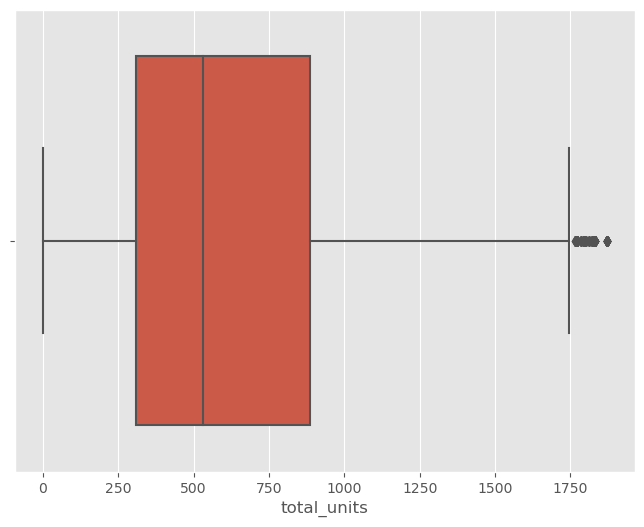

In [17]:
#remove outlier
Q1 = train_df['total_units'].quantile(0.25)
Q3 = train_df['total_units'].quantile(0.75)
IQR = Q3 - Q1

outliers = (train_df['total_units'] < (Q1 - 1.5 * IQR)) | (train_df['total_units'] > (Q3 + 1.5 * IQR))

# Remove outliers
train_df = train_df[~outliers]

# Create a box plot for the cleaned 'total_units' data
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['total_units'])
plt.show()



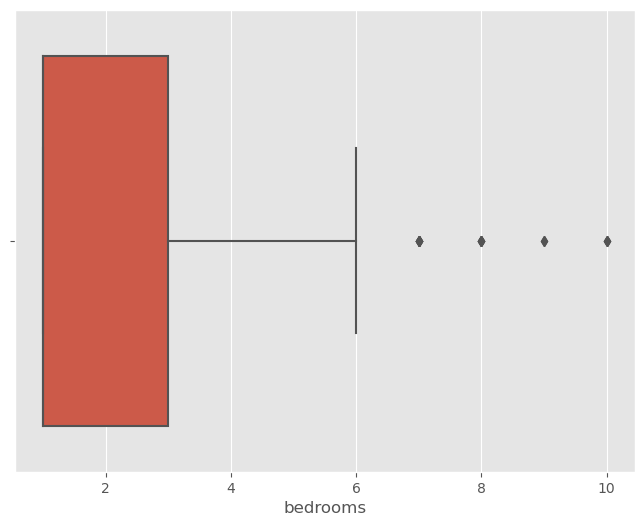

In [18]:
#check outlier but i think 10 room is possible
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['bedrooms'])
plt.show()

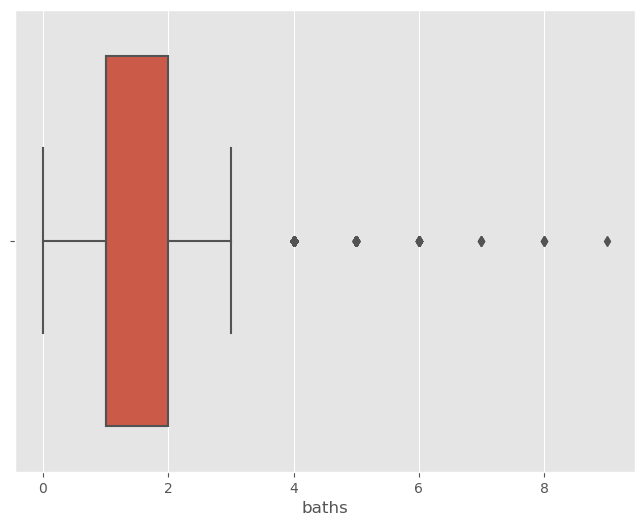

In [19]:
#check outlier but i think 10 room is possible
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['baths'])
plt.show()

/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


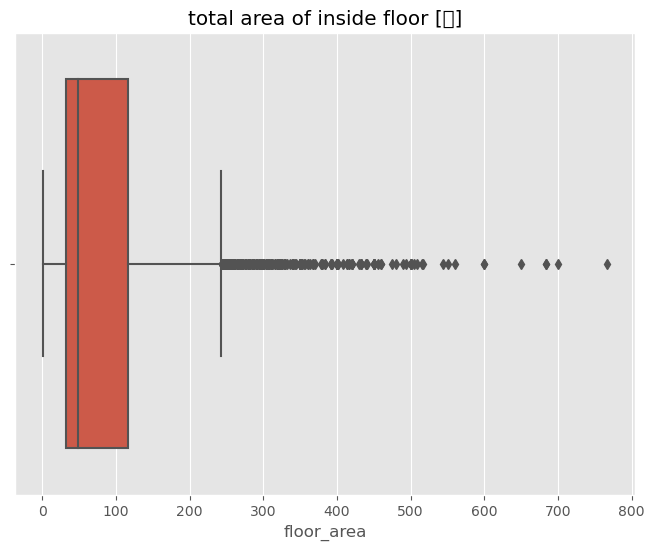

In [20]:
#Check outlier of floor area found outlier 
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['floor_area'])
plt.title("total area of inside floor [㎡]")
#plt.savefig("outlier of floorarea.png")
plt.show()

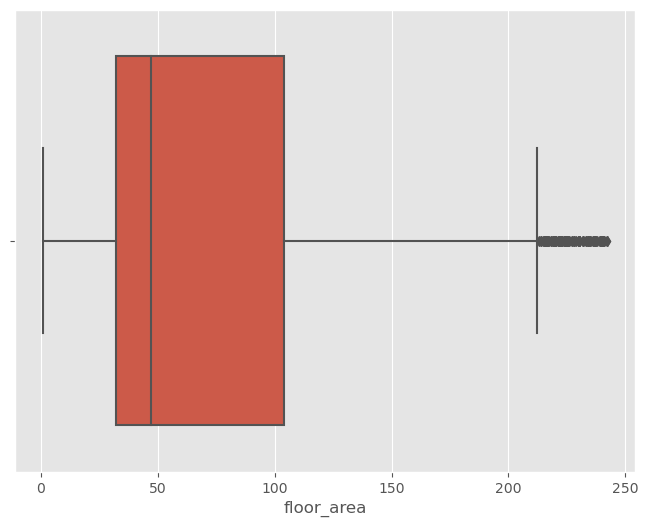

In [21]:
#remove outlier
Q1 = train_df['floor_area'].quantile(0.25)
Q3 = train_df['floor_area'].quantile(0.75)
IQR = Q3 - Q1

outliers = (train_df['floor_area'] < (Q1 - 1.5 * IQR)) | (train_df['floor_area'] > (Q3 + 1.5 * IQR))

# Remove outliers
train_df = train_df[~outliers]

# Create a box plot for the cleaned 'total_units' data
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['floor_area'])
plt.show()



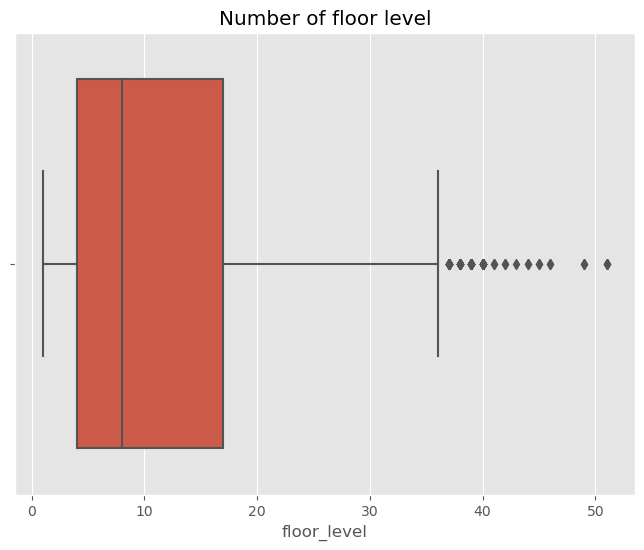

In [22]:
#check outlier and found outlier 
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['floor_level'])
plt.title("Number of floor level")
#plt.savefig("outlier of floorlevel.png")
plt.show()

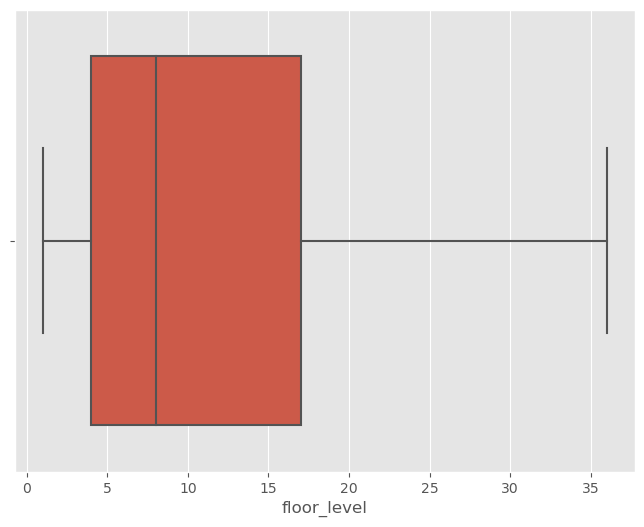

In [23]:
#remove outlier
Q1 = train_df['floor_level'].quantile(0.25)
Q3 = train_df['floor_level'].quantile(0.75)
IQR = Q3 - Q1

outliers = (train_df['floor_level'] < (Q1 - 1.5 * IQR)) | (train_df['floor_level'] > (Q3 + 1.5 * IQR))

# Remove outliers
train_df = train_df[~outliers]

# Create a box plot for the cleaned 'total_units' data
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['floor_level'])
plt.show()



### Province

In [24]:
train_df["province"].isnull().sum()

0

In [25]:
#no null values
train_df["province"].value_counts()

Bangkok         8528
Nonthaburi      2712
Samut Prakan    2051
Name: province, dtype: int64

In [26]:
## After check province found dont have null Values 

### Dictrict

In [27]:
train_df["district"].isnull().sum()

0

In [28]:
#Check name of province 
train_df["district"].unique()

array(['Watthana', 'Khlong Toei', 'Bang Kruai', 'Mueang Nonthaburi',
       'Bang Rak', 'Pak Kret', 'Sai Mai', 'Pathum Wan', 'Chatuchak',
       'Mueang Samut Prakan', 'Prawet', 'Bang Bua Thong', 'Huai Khwang',
       'Phra Khanong', 'Suan Luang', 'Bueng Kum', 'Bang Kapi',
       'Nong Khaem', 'Bang Phli', 'Phra Samut Jadee', 'Bang Yai',
       'Bang Sao Thong', 'Phaya Thai', 'Saphan Sung', 'Din Daeng',
       'Don Mueang', 'Ratchathewi', 'Thon Buri', 'Bang Phlat', 'Min Buri',
       'Lak Si', 'Khlong Sam Wa', 'Yan Nawa', 'Sai Noi', 'Bang Na',
       'Bang Khen', 'Phra Pradaeng', 'Lat Phrao', 'Bang Sue',
       'Khan Na Yao', 'Khlong San', 'Bangkok Noi', 'Phasi Charoen',
       'Chom Thong', 'Lat Krabang', 'Wang Thonglang', 'Bang Khun Thian',
       'Nong Chok', 'Bang Kho Laem', 'Bang Bo', 'Sathon', 'Rat Burana',
       'Thung Khru', 'Bangkok Yai', 'Bang Khae', 'Thawi Watthana',
       'Bang Bon', 'Taling Chan'], dtype=object)

In [29]:
## After check pDistrict found there are no null Values 

### property_type

In [30]:
train_df["property_type"].value_counts()

Condo             8695
Townhouse         2780
Detached House    1816
Name: property_type, dtype: int64

In [31]:
train_df["property_type"].isnull().sum()
#there is no Null values

0

### Total_units

In [32]:
#check null values
train_df["total_units"].isnull().sum()

3399

In [33]:
#fill null values by mean of total valuse groupby property type
mean_total_units_by_property_type = train_df.groupby('property_type')['total_units'].transform('mean')
train_df['total_units'].fillna(mean_total_units_by_property_type, inplace=True)


In [34]:
train_df["total_units"].isnull().sum()

0

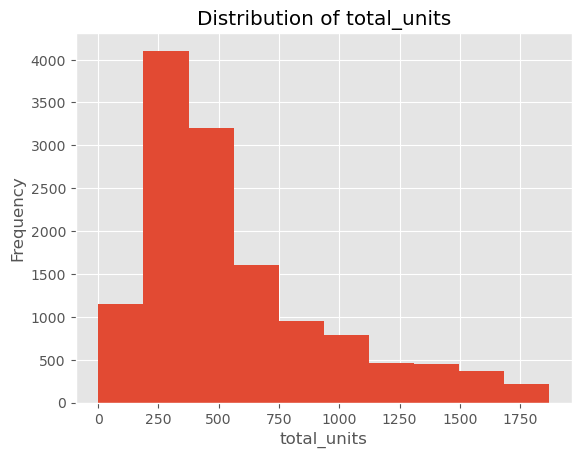

In [35]:
plt.hist(train_df["total_units"]);
plt.xlabel('total_units')  
plt.ylabel('Frequency')   
plt.title('Distribution of total_units')  
plt.show()

### Bedrooms

In [36]:
#check null value
train_df["bedrooms"].isnull().sum()

38

In [37]:
#fill null values by mean of bedroom groupby property type
mean_bedrooms_by_property_type = train_df.groupby('property_type')['bedrooms'].transform('mean')
train_df['bedrooms'].fillna(mean_bedrooms_by_property_type, inplace=True)


In [38]:
train_df["bedrooms"].isnull().sum()

0

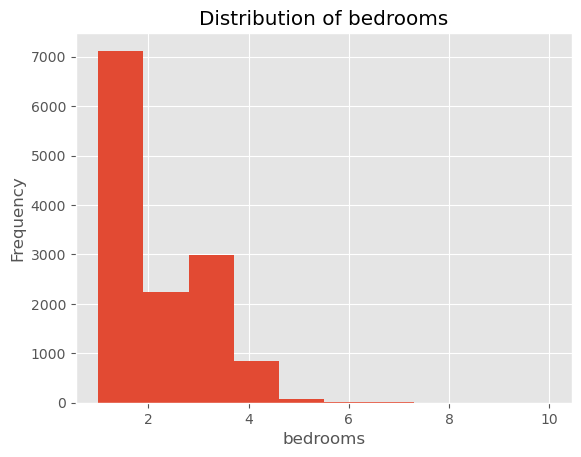

In [39]:
plt.hist(train_df["bedrooms"]);
plt.xlabel('bedrooms')  
plt.ylabel('Frequency')   
plt.title('Distribution of bedrooms')  
plt.show()

### Bathroom

In [40]:
#check null values
train_df["baths"].isnull().sum()

32

In [41]:
#fill null values by mean of bedroom groupby property type
mean_baths_by_property_type = train_df.groupby('property_type')['baths'].transform('mean')
train_df['baths'].fillna(mean_baths_by_property_type, inplace=True)


In [42]:
train_df["baths"].isnull().sum()

0

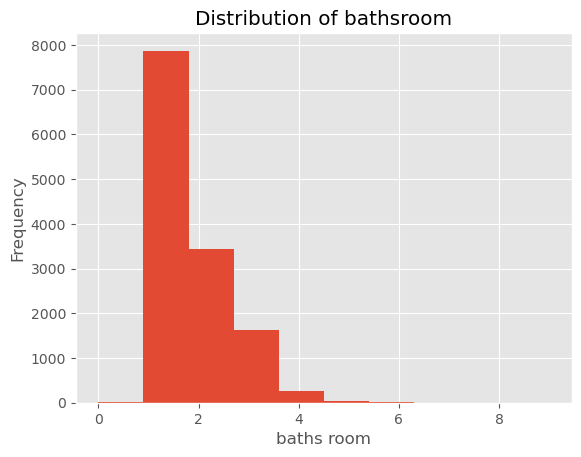

In [43]:
plt.hist(train_df["baths"]);
plt.xlabel("baths room")  
plt.ylabel('Frequency')   
plt.title('Distribution of bathsroom')  
plt.show()

### floor_area

In [44]:
#check null values no null values
train_df["floor_area"].isnull().sum()

0

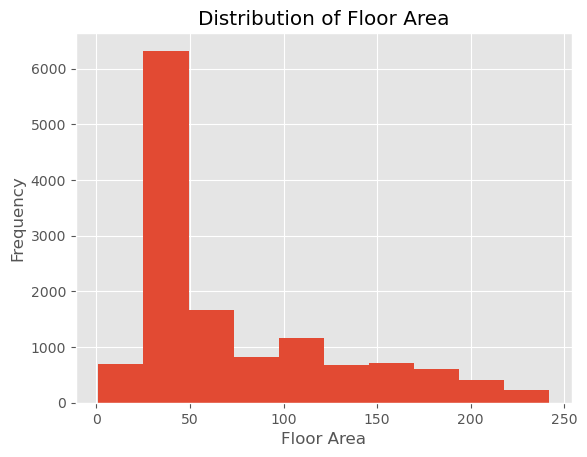

In [45]:
plt.hist(train_df["floor_area"]);
plt.xlabel('Floor Area')  
plt.ylabel('Frequency')   
plt.title('Distribution of Floor Area')  
plt.show()

### floor_level 


In [46]:
#check null values
train_df["floor_level"].isnull().sum()

5705

In [47]:
pd.set_option('display.max_columns', None)

In [48]:
#fill null values by mean of floor level groupby property type
mean_floor_level_by_property_type = train_df.groupby('property_type')['floor_level'].transform('mean')
train_df['floor_level'].fillna(mean_floor_level_by_property_type, inplace=True)


In [49]:
train_df["floor_level"].isnull().sum()

0

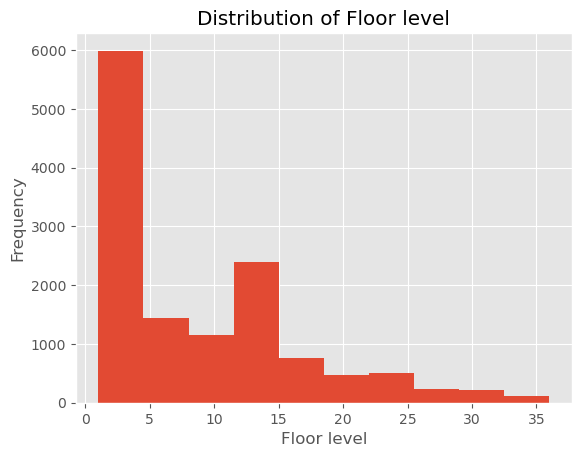

In [50]:
plt.hist(train_df["floor_level"]);
plt.xlabel('Floor level')  
plt.ylabel('Frequency')   
plt.title('Distribution of Floor level')  
plt.show()

### nearby_stations

In [51]:
train_df["nearby_stations"].isnull().sum()

0

In [52]:
train_df["nearby_stations"].value_counts()

0    6520
2    2870
1    2317
3    1584
Name: nearby_stations, dtype: int64

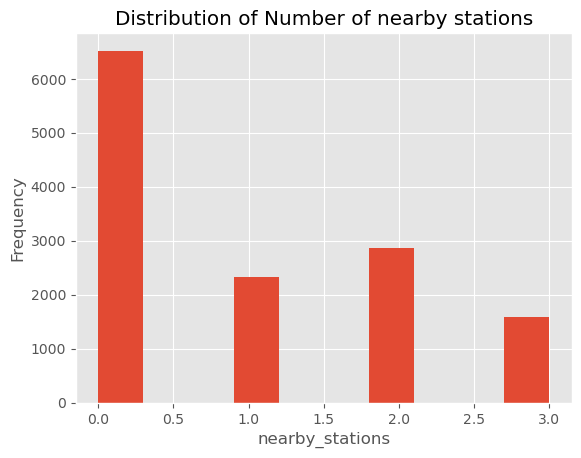

In [53]:
train_df["nearby_stations"].hist()
plt.xlabel('nearby_stations')  
plt.ylabel('Frequency')   
plt.title('Distribution of Number of nearby stations')  
plt.show()

### nearby_supermarkets

In [54]:
train_df["nearby_supermarkets"].isnull().sum()

357

In [55]:
#fill null values by mean of nearby supermarkets groupby property type
mean_nearby_supermarkets_by_property_type = train_df.groupby('property_type')['nearby_supermarkets'].transform('mean')
train_df['nearby_supermarkets'].fillna(mean_nearby_supermarkets_by_property_type, inplace=True)


In [56]:
train_df["nearby_supermarkets"].isnull().sum()

0

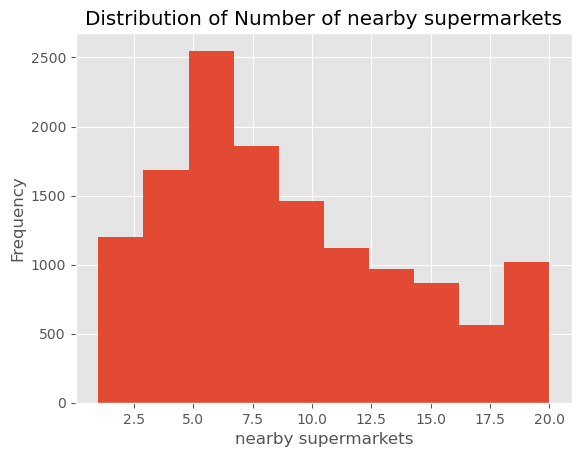

In [57]:
train_df["nearby_supermarkets"].hist()
plt.xlabel('nearby supermarkets')  
plt.ylabel('Frequency')   
plt.title('Distribution of Number of nearby supermarkets')  
plt.show()

### nearby_shops

In [58]:
train_df["nearby_shops"].isnull().sum()

0

In [59]:
train_df["nearby_shops"].value_counts()

20    3320
3      969
2      958
4      876
5      848
6      820
1      805
8      694
10     571
7      528
13     449
9      423
11     352
12     331
15     305
17     298
14     224
18     194
19     188
16     138
Name: nearby_shops, dtype: int64

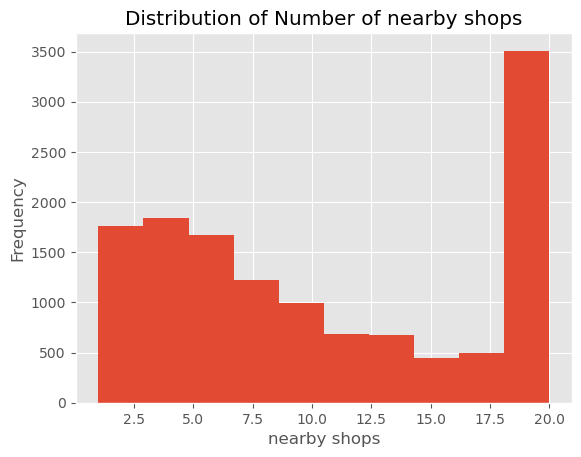

In [60]:
train_df["nearby_shops"].hist()
plt.xlabel('nearby shops')  
plt.ylabel('Frequency')   
plt.title('Distribution of Number of nearby shops')  
plt.show()

## Facility

In [61]:
train_df["facilities"].isnull().sum()

0

### LATITUDE AND LONGTITUDE

In [79]:
#find median of longtitude and lattitude of train_df
long_med = train_df["longitude"].median()
lat_med = train_df["latitude"].median()
print(long_med)
print(lat_med)

100.571186
13.750083


In [83]:
#create distance of property from median of lattitude , longtitude
train_df['long_distance'] = train_df['longitude'].apply(lambda x: abs(x-long_med))
train_df['lat_distance'] = train_df['latitude'].apply(lambda x: abs(x-lat_med))

In [102]:
# Group by district and calculate the mean price
avg_price_by_district = train_df.groupby('district')['price'].mean().reset_index()

# Sort the districts by average price in descending order
top_3_districts = avg_price_by_district.sort_values(by='price', ascending=False).head(3)

print(top_3_districts)


       district         price
12     Bang Rak  6.823740e+06
37   Pathum Wan  6.717980e+06
45  Ratchathewi  6.170693e+06


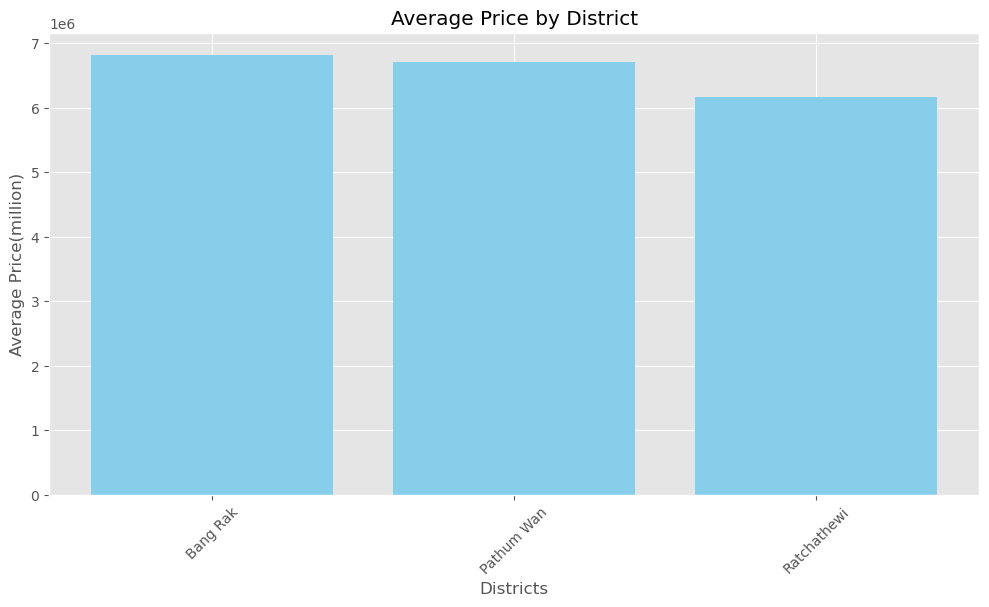

In [105]:
import matplotlib.pyplot as plt

# สร้างข้อมูล
districts = ['Bang Rak', 'Pathum Wan', 'Ratchathewi']
prices = [6.823740e+06, 6.717980e+06, 6.170693e+06]

# สร้างกราฟ barchart
plt.figure(figsize=(12, 6))
plt.bar(districts, prices, color='skyblue')
plt.xlabel('Districts')
plt.ylabel('Average Price(million)')
plt.title('Average Price by District')
plt.xticks(rotation=45)  # หมุน label ให้ไม่ทับกัน
plt.savefig("avgppp.png")
plt.show()


## Test Data

In [64]:
# Fill null values in test_df based on property_type means from test_df
#fill null values by mean of total valuse groupby property type
mean_total_units_by_property_type_test = test_df.groupby('property_type')['total_units'].transform('mean')
test_df['total_units'].fillna(mean_total_units_by_property_type_test, inplace=True)


#fill null values by mean of bedroom groupby property type
mean_bedrooms_by_property_type_test = test_df.groupby('property_type')['bedrooms'].transform('mean')
test_df['bedrooms'].fillna(mean_bedrooms_by_property_type_test, inplace=True)


#fill null values by mean of bathsroom groupby property type
mean_baths_by_property_type_test = test_df.groupby('property_type')['baths'].transform('mean')
test_df['baths'].fillna(mean_baths_by_property_type_test, inplace=True)


#fill null values by mean of floor level groupby property type
mean_floor_level_by_property_type_test = test_df.groupby('property_type')['floor_level'].transform('mean')
test_df['floor_level'].fillna(mean_floor_level_by_property_type_test, inplace=True)

#fill null values by mean of number of nearby supermarkets groupby property type
mean_nearby_supermarkets_by_property_type_test = test_df.groupby('property_type')['nearby_supermarkets'].transform('mean')
test_df['nearby_supermarkets'].fillna(mean_nearby_supermarkets_by_property_type_test, inplace=True)

#create distance of property from median of lattitude , longtitude
long_med = test_df["longitude"].median()
lat_med = test_df["latitude"].median()
print(long_med)
print(lat_med)
test_df['long_distance'] = test_df['longitude'].apply(lambda x: abs(x-long_med))
test_df['lat_distance'] = test_df['latitude'].apply(lambda x: abs(x-lat_med))

100.5713340688
13.75499795825


## Modelling

In [65]:
# use One-Hot Encoding for catagory data
X_encoded = pd.get_dummies(train_df[['province', 'district', 'property_type']],drop_first=True)

# ramaining column
X_remaining = train_df[['bedrooms', 'baths', 'nearby_stations', "floor_area", "nearby_shops","floor_level","long_distance","lat_distance"]]

# concat all column
X = pd.concat([X_encoded, X_remaining], axis=1)

y = train_df['price']

# train and test split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
print(X_train.shape)
print(X_test.shape)

(10632, 69)
(2659, 69)


In [67]:
#use StandardScaler to be a same scale 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [68]:
X_train_sclaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [69]:
model = LinearRegression()

In [70]:
model.fit(X_train_sclaled,y_train)

LinearRegression()

In [71]:
y_pred_train = model.predict(X_train_sclaled)
y_pred_test = model.predict(X_test_scaled)

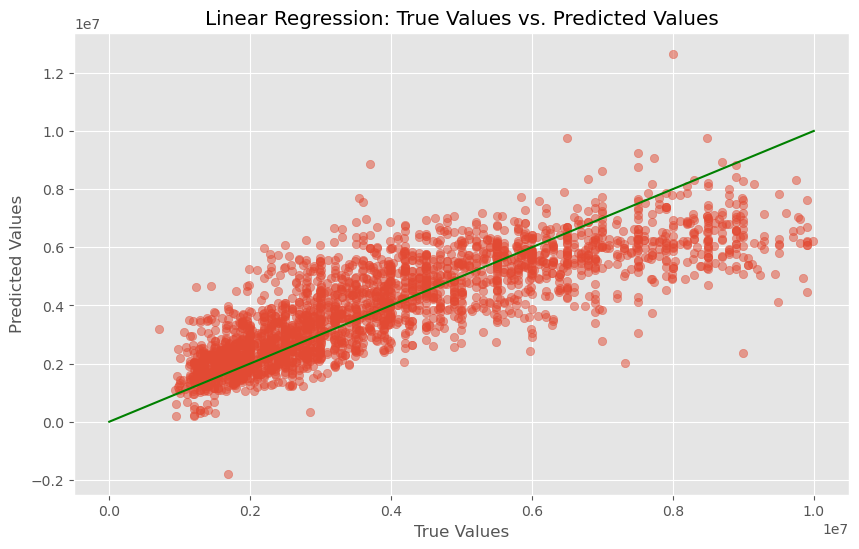

In [72]:
# plot Linear Regression
plt.figure(figsize=(10, 6))

# plot True value (y_test) in x and predict value (y_pred_test) in y
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot(np.linspace(0, 1e7, 100), np.linspace(0, 1e7, 100), color='green');
plt.title('Linear Regression: True Values vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


In [73]:
#Evaluate the performance of the model using RMSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train =np.sqrt(mse_train)
rmse_test =np.sqrt(mse_test)
print(f"RRMSE: {rmse_train}")
print(f"RRMSE: {rmse_test}")

RRMSE: 1246887.2380485123
RRMSE: 1251252.011610228


In [74]:
#Evaluate the performance of the model using R2 score
print(f" R2_train score is {model.score(X_train_sclaled,y_train)}")
print(f" R2_test score is {model.score(X_test_scaled,y_test)}")

 R2_train score is 0.6598583521695984
 R2_test score is 0.664475445523721


In [75]:
# Create KFold Cross Validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#  Cross Validation model by KFold Cross Validator
results = cross_val_score(model, X_train_sclaled, y_train, cv=kfold, scoring='r2')

print(f'R2 scores: {results}')
print(f'Mean R2 score: {results.mean()}')

R2 scores: [0.66841759 0.64043314 0.68656657 0.63081773 0.64867119]
Mean R2 score: 0.6549812442603401


In [76]:
from sklearn.linear_model import Ridge, RidgeCV

# Create RidgeCV model 
ridge_cv = RidgeCV(alphas=np.logspace(0, 10, 13), cv=5)
ridge_cv.fit(X_train_sclaled, y_train)

# use best alpha to find best model of  Ridge
best_alpha = ridge_cv.alpha_
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_sclaled, y_train)

# Evaluate model
train_r2 = ridge_model.score(X_train_sclaled, y_train)
test_r2 = ridge_model.score(X_test_scaled, y_test)

print(f'R2_train score is {train_r2}')
print(f'R2_test score is {test_r2}')

y_pred_train_ridge = ridge_model.predict(X_train_sclaled)
y_pred_test_ridge = ridge_model.predict(X_test_scaled)

# Calculate MSE fot train set and test set
r_mse_train_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
r_mse_test_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))

print(f'RMSE train for Ridge: {r_mse_train_ridge}')
print(f'RMSE test for Ridge: {r_mse_test_ridge}')


R2_train score is 0.6598521364197587
R2_test score is 0.6643410392310569
RMSE train for Ridge: 1246898.630807665
RMSE test for Ridge: 1251502.603262857


In [77]:
# use One-Hot Encoding for categorical data in test_df
X_test_encoded = pd.get_dummies(test_df[['province', 'district', 'property_type']], drop_first=True)

# Select the remaining columns
X_test_remaining = test_df[['bedrooms', 'baths', 'nearby_stations', "floor_area", "nearby_shops", "floor_level","long_distance","lat_distance"]]

# Combine the encoded and remaining data
X_valid = pd.concat([X_test_encoded, X_test_remaining], axis=1)

# Scale the data using the same StandardScaler object
X_valid_scaled = ss.transform(X_valid)

# Predict the prices
y_pred = ridge_model.predict(X_valid_scaled)



### submission

In [78]:
submission = pd.DataFrame({'id': test_df['id'], 'price': y_pred})

#Save submission as CSV
#submission.to_csv('SubmissionLastridge.csv', index=False)